In [2]:
pip install mysql-connector-python


   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.4 MB 8.4 MB/s eta 0:00:02
   ------ --------------------------------- 2.6/16.4 MB 7.6 MB/s eta 0:00:02
   ----------- ---------------------------- 4.7/16.4 MB 8.7 MB/s eta 0:00:02
   --------------- ------------------------ 6.3/16.4 MB 8.6 MB/s eta 0:00:02
   ------------------- -------------------- 7.9/16.4 MB 8.1 MB/s eta 0:00:02
   ---------------------- ----------------- 9.2/16.4 MB 7.8 MB/s eta 0:00:01
   -------------------------- ------------- 10.7/16.4 MB 7.8 MB/s eta 0:00:01
   ----------------------------- ---------- 12.1/16.4 MB 7.6 MB/s eta 0:00:01
   ---------------------------------- ----- 14.2/16.4 MB 7.8 MB/s eta 0:00:01
   -------------------------------------- - 15.7/16.4 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------  16.3/16.4 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 16.4/16.4 MB 6.9 MB/s eta 0:00:00

In [6]:
import mysql.connector
import pandas as pd

# Connect to server
cnx = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="Son@SQL123")

In [5]:
query = "SELECT * FROM banking_analysis.customer"

In [7]:
df=pd.read_sql(query , cnx)

C:\Users\91859\AppData\Local\Temp\ipykernel_11608\648813679.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query , cnx)


In [8]:
cnx.close()

In [9]:
df.head(5)

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Client ID              3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df.shape

(3000, 25)

In [16]:
#Generating descriptive statistics for the dataframe
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [18]:
#converting from numerical data to categorical data
bins = [0, 100000 , 300000 , float('inf')]
labels=['low' , 'med' , 'high']

df['Income band'] =  pd.cut(df['Estimated Income'] , bins=bins , labels=labels , right=False)

<Axes: xlabel='Income band'>

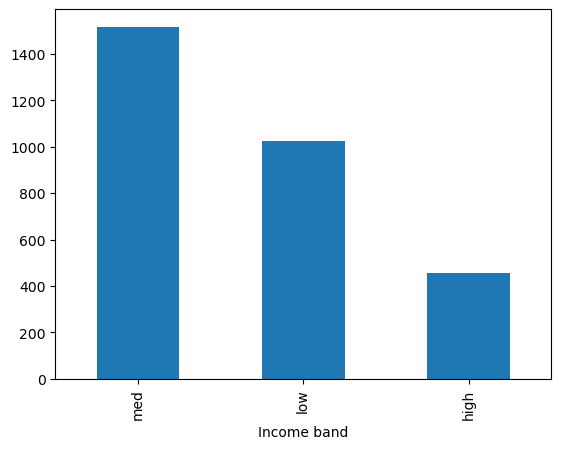

In [21]:
df['Income band'].value_counts().plot(kind='bar')

In [23]:
# Examine  the distribution of unique categories in categorical colm
categorical_cols = df[["BRId" , "GenderId" ,"Amount of Credit Cards" , "Nationality" , "Occupation" , "Fee Structure", "Loyalty Classification" , "Properties Owned" , "Risk Weighting" , "Income band" ,"IAId"]].columns

for col in categorical_cols:
    print(f"Value Counts for '{col}':")
    display(df[col].value_counts())

Value Counts for 'BRId':


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Counts for 'GenderId':


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value Counts for 'Amount of Credit Cards':


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for 'Occupation':


Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Counts for 'Fee Structure':


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Counts for 'Loyalty Classification':


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value Counts for 'Properties Owned':


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value Counts for 'Risk Weighting':


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value Counts for 'Income band':


Income band
med     1517
low     1027
high     456
Name: count, dtype: int64

Value Counts for 'IAId':


IAId
1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

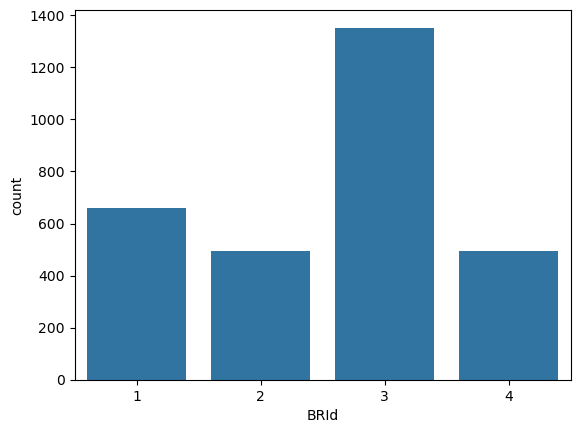

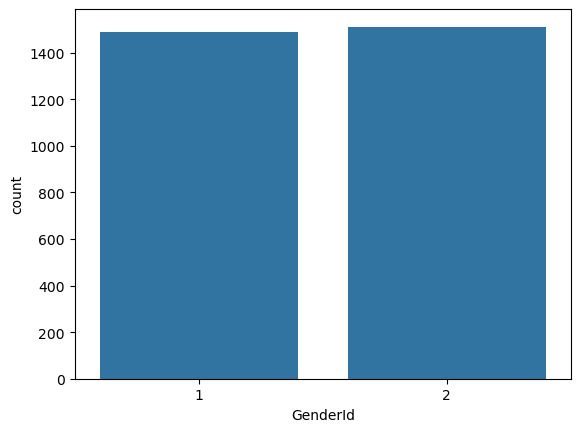

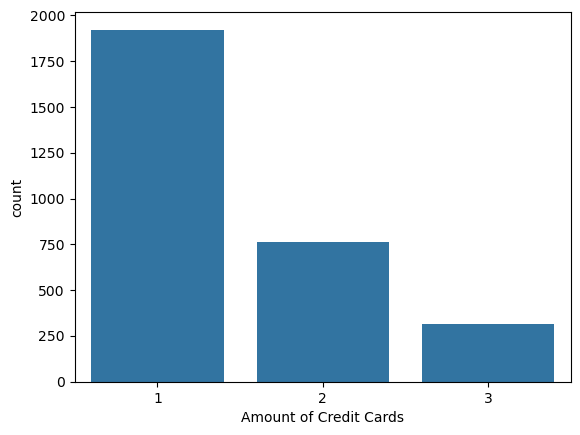

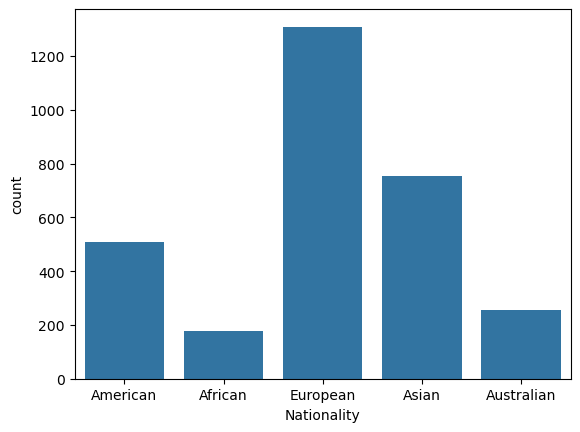

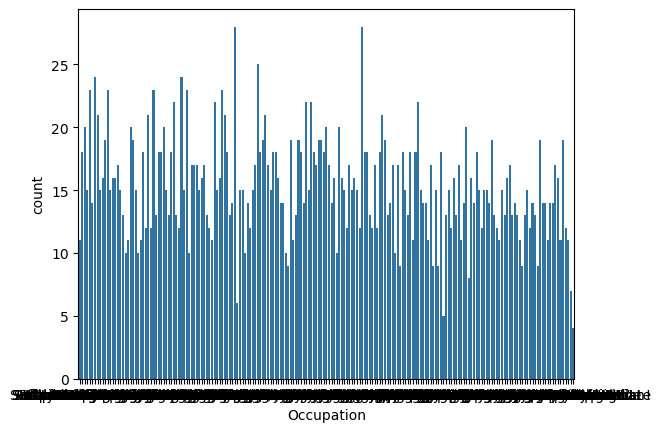

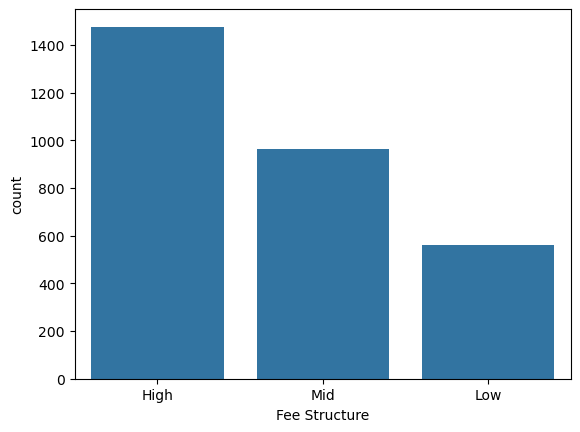

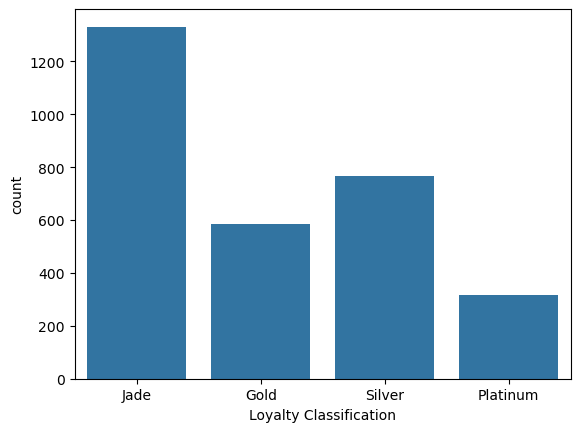

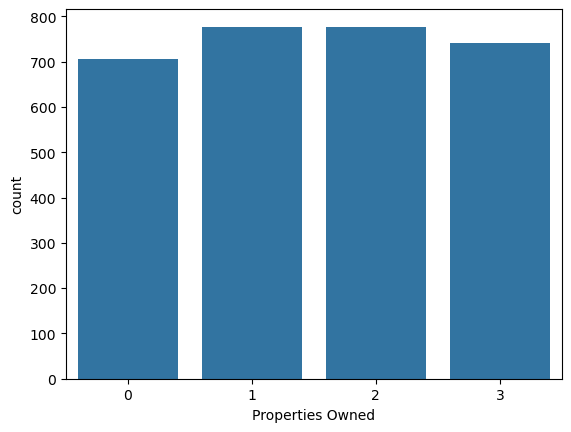

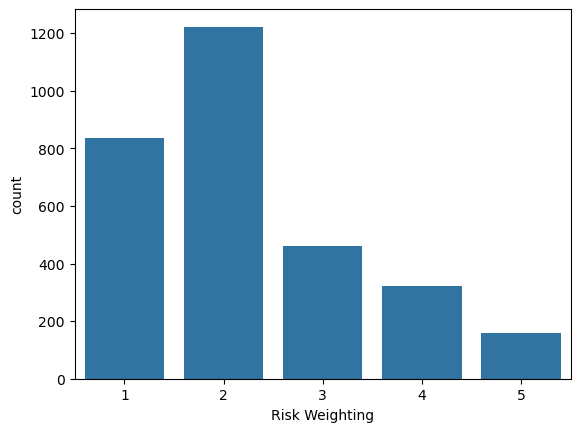

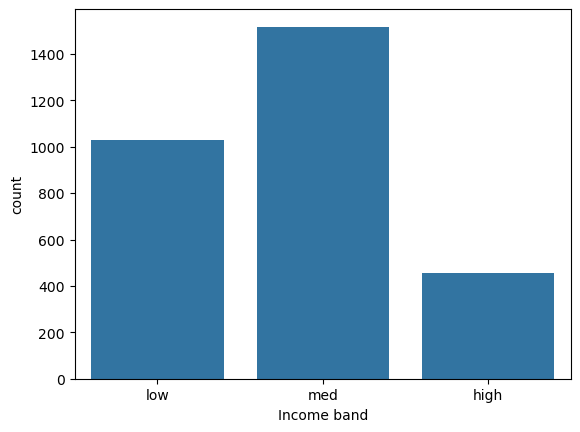

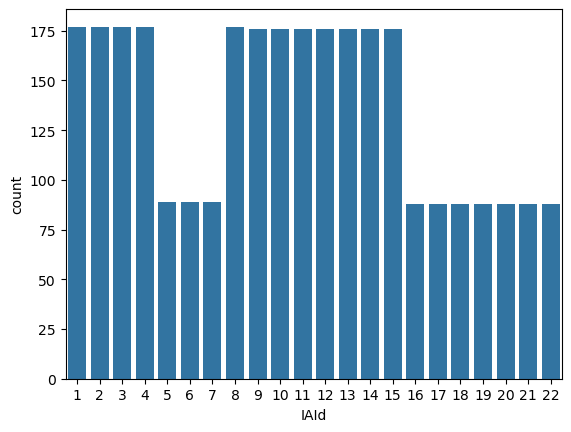

In [26]:
for i, predictor in enumerate (df[["BRId" , "GenderId" ,"Amount of Credit Cards" , "Nationality" , "Occupation" , "Fee Structure", "Loyalty Classification" , "Properties Owned" , "Risk Weighting" , "Income band" ,"IAId"]].columns) :
    plt.figure(i)
    sns.countplot(data =df , x=predictor )

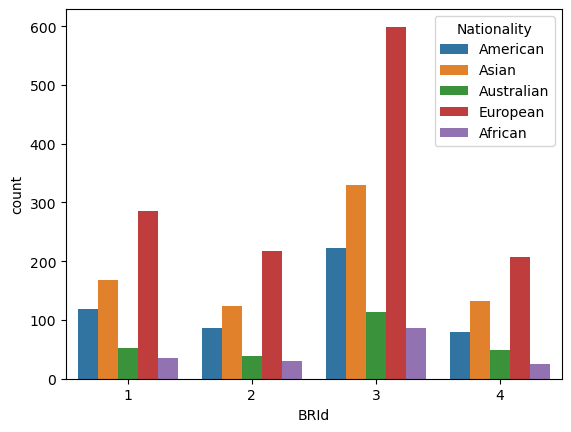

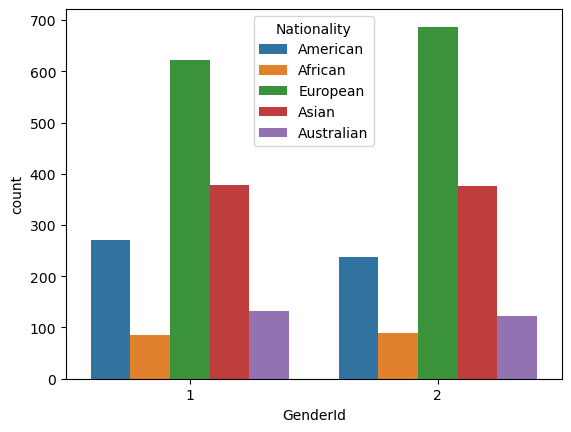

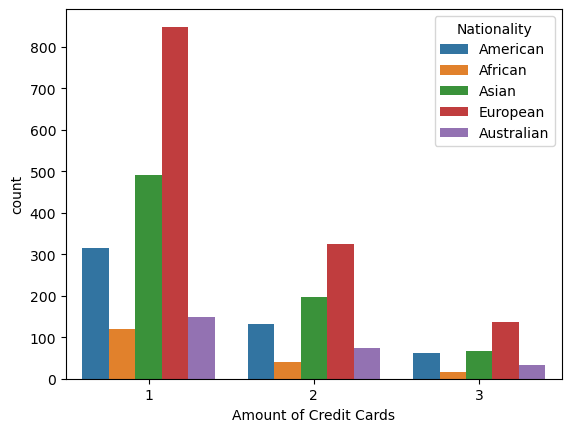

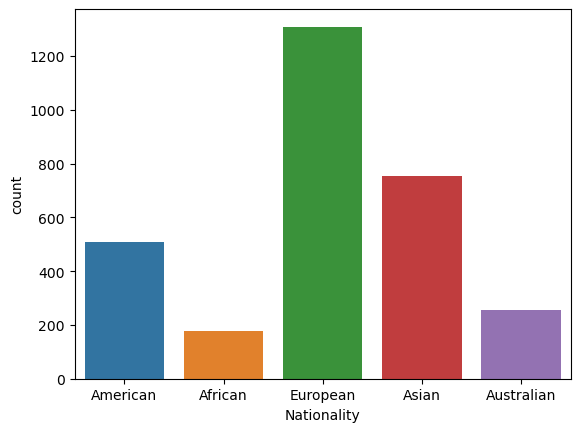

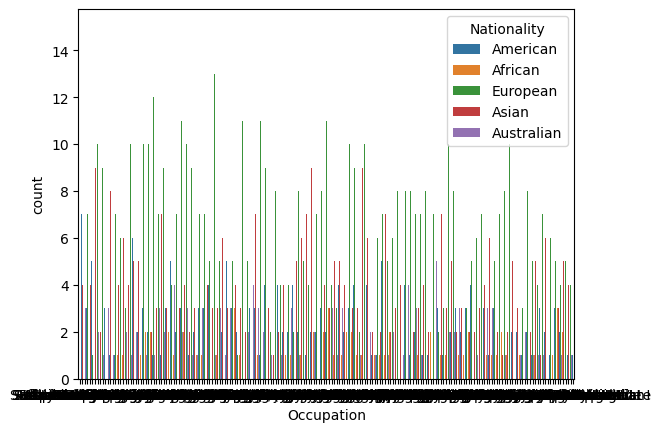

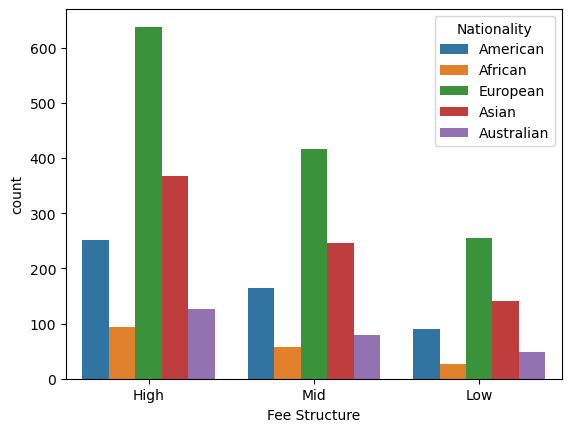

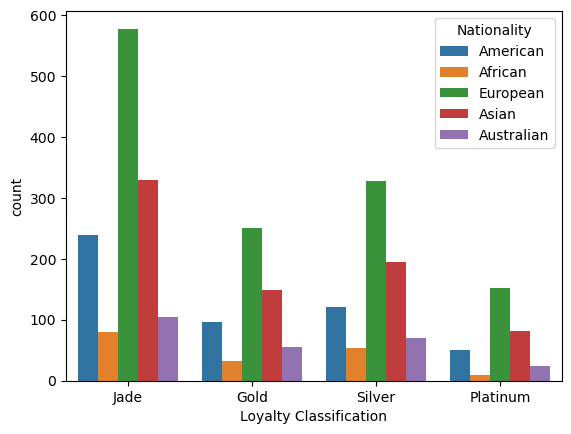

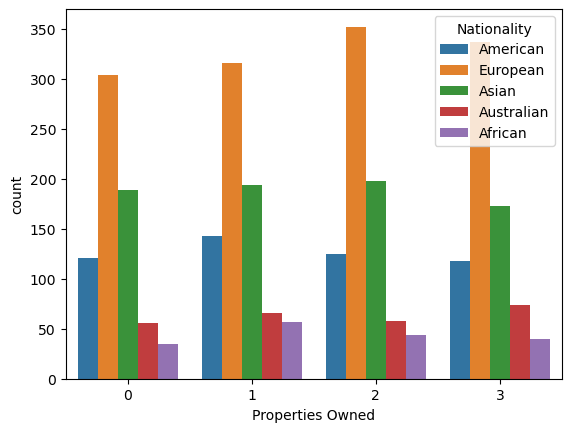

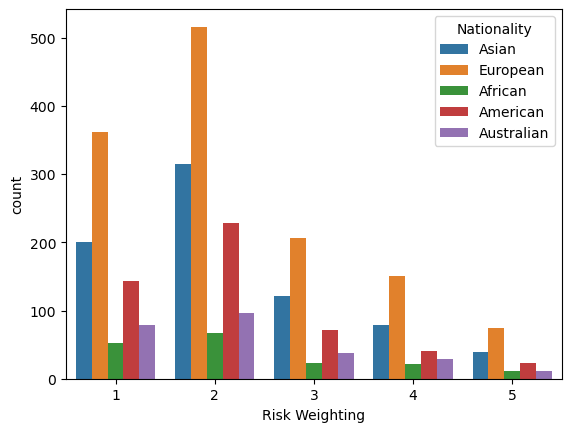

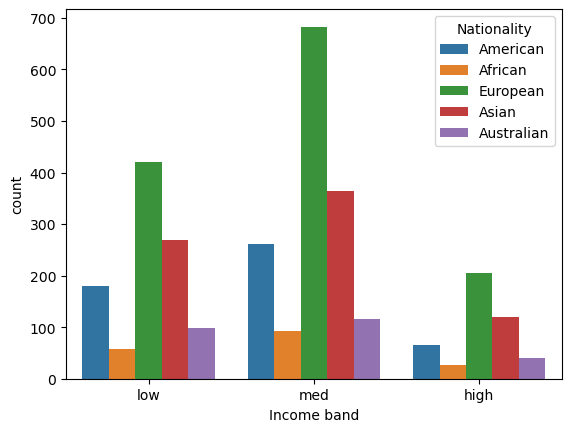

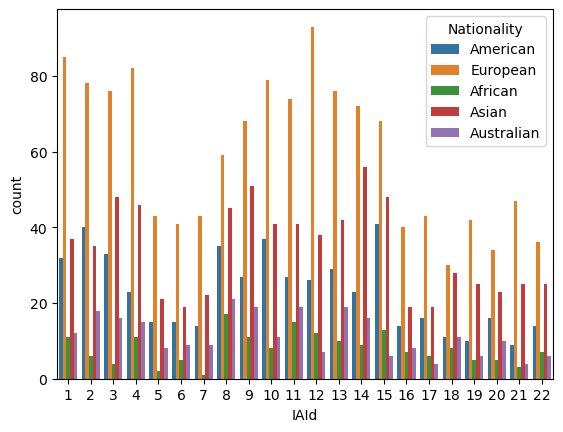

In [28]:
for i, predictor in enumerate (df[["BRId" , "GenderId" ,"Amount of Credit Cards" , "Nationality" , "Occupation" , "Fee Structure", "Loyalty Classification" , "Properties Owned" , "Risk Weighting" , "Income band" ,"IAId"]].columns) :
    plt.figure(i)
    sns.countplot(data =df , x=predictor, hue='Nationality' )

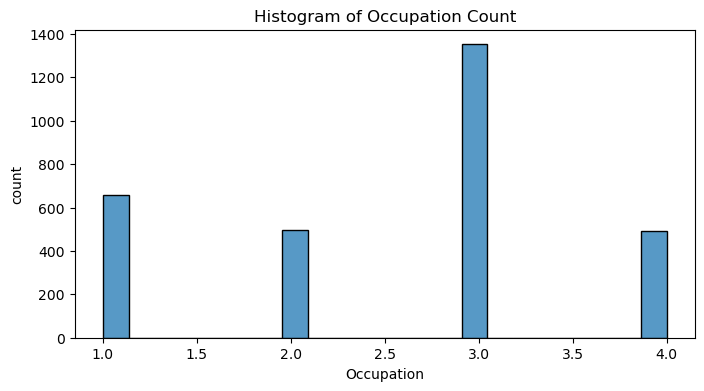

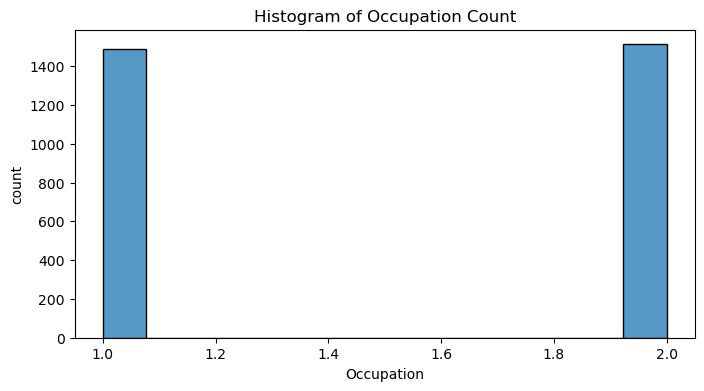

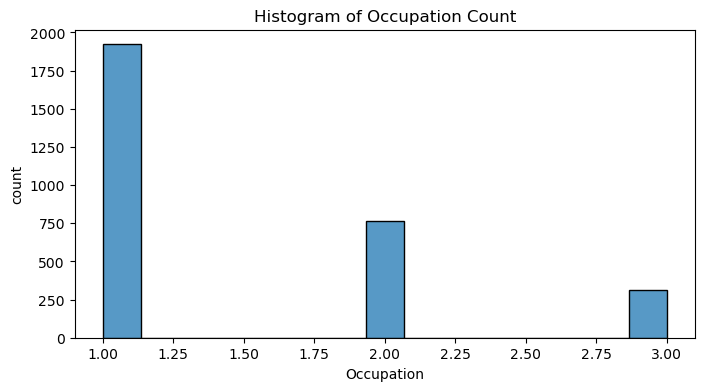

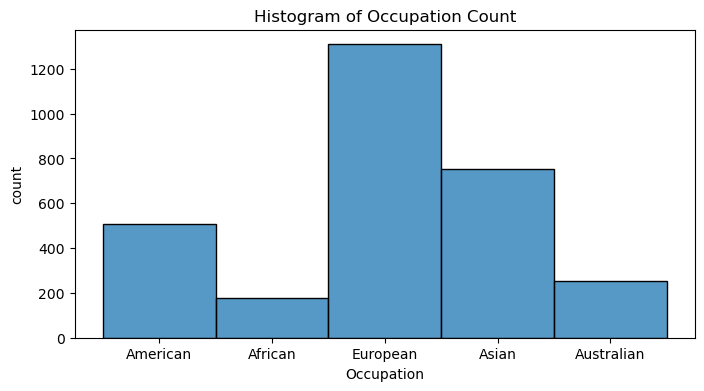

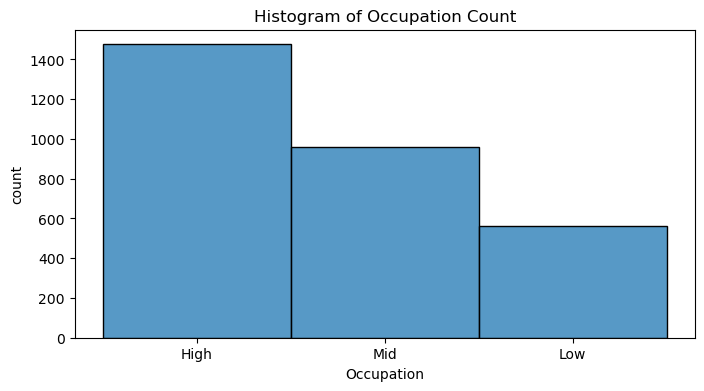

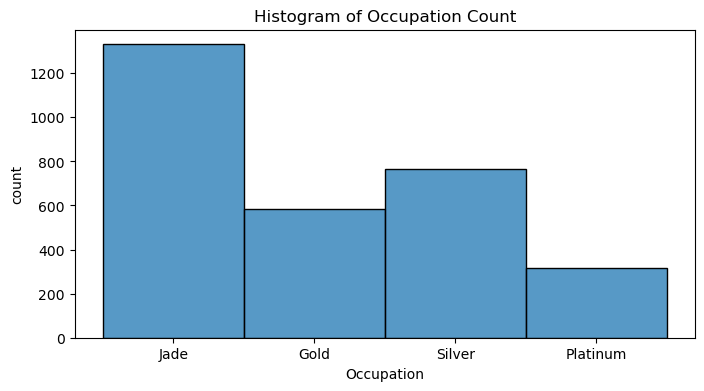

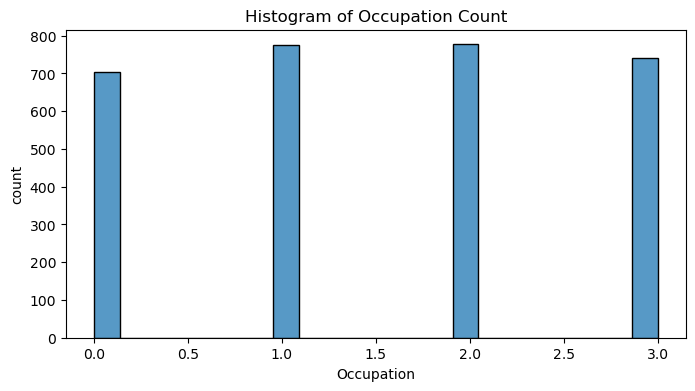

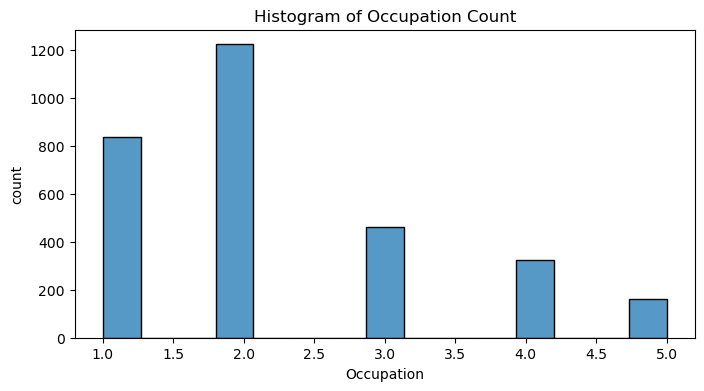

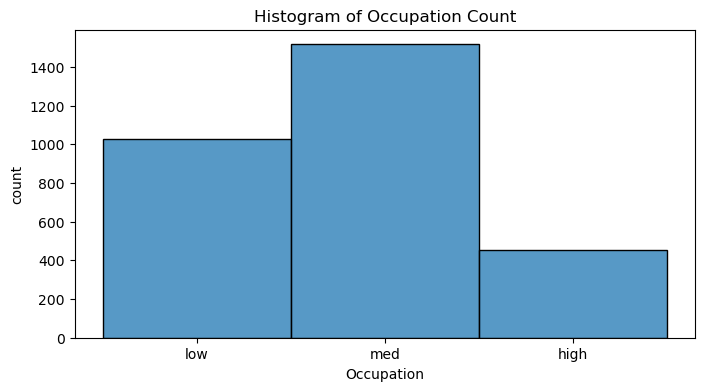

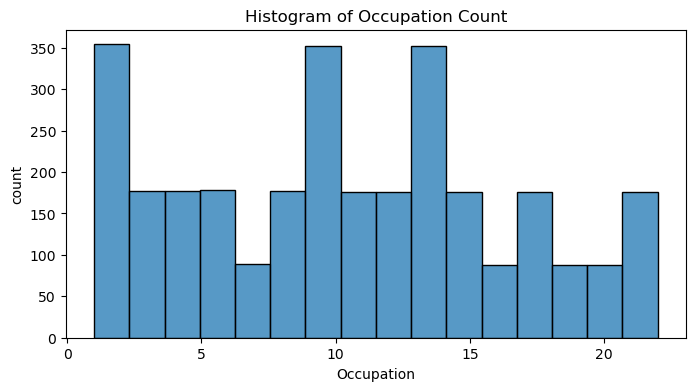

In [29]:
# hist plots  of value counts for different occupation
for col in categorical_cols:
    if col=="Occupation":
        continue
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.title('Histogram of Occupation Count')
    plt.xlabel('Occupation')
    plt.ylabel("count")
    plt.show()

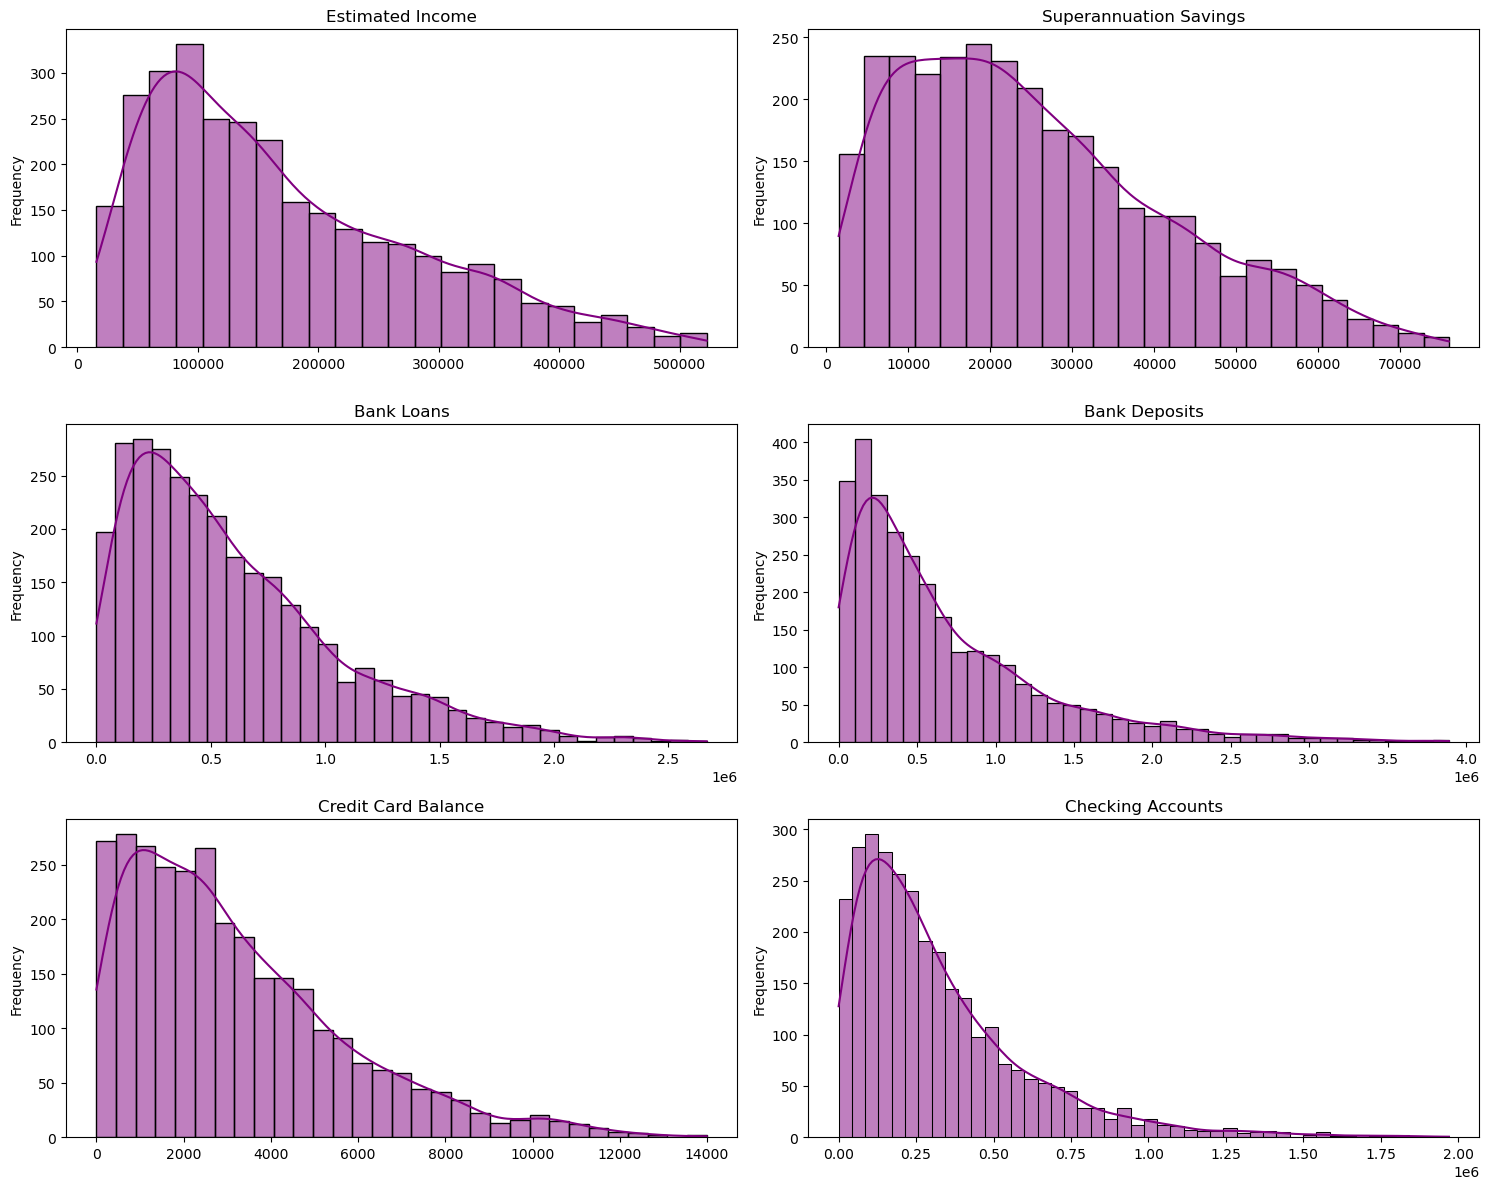

In [38]:
#numerical analysis
numerical_col=['Estimated Income' , 'Superannuation Savings' , 'Bank Loans' ,'Bank Deposits' , 'Credit Card Balance','Checking Accounts']

#univariate analysis and visualization

plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_col):
    plt.subplot(3, 2, i + 1) # 3 rows × 2 columns
    sns.histplot(df[col], kde=True, color='purple')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

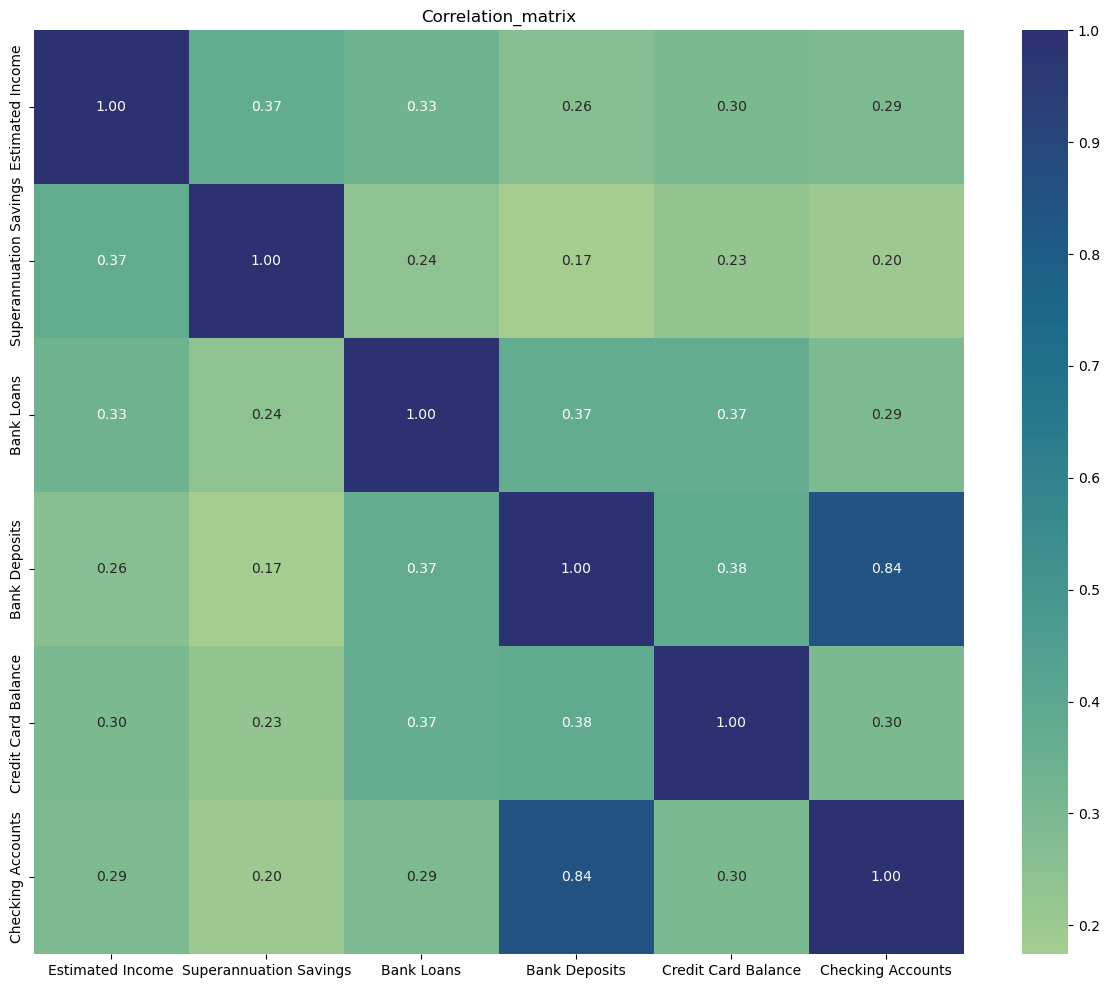

In [39]:
#heatmaps
numerical_col=['Estimated Income' , 'Superannuation Savings' , 'Bank Loans' ,'Bank Deposits' , 'Credit Card Balance','Checking Accounts']

correlation_matrix = df[numerical_col].corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix , annot=True , cmap='crest' , fmt=".2f")
plt.title("Correlation_matrix")
plt.show()

In [ ]:

# ##  Key Insights from the EDA

# ### 1. Customer Income Segmentation

# -- The feature `Estimated Income` is **binned** into:

#   - `low` (0 to 1,00,000)
#   - `med` (1,00,000 to 3,00,000)
#   - `high` (above 3,00,000)
# -- This helps classify customers by income band, making it easier to analyze behavior across income segments.

#  **Insight**: You can compare how loyalty, credit card ownership, and risk levels vary by income group.


# ### 2. Categorical Value Distributions

# -- Count plots and value counts are generated for:

#   - `GenderId`, `Nationality`, `Occupation`, `Fee Structure`, `Loyalty Classification`, etc.

# Insight: You can see which customer groups are most common, such as which occupation or nationality dominates your customer base.


# ### 3. **Gender & Nationality-Based Distribution**

# * Count plots are created **with hue = 'Nationality'**, showing how each categorical variable varies across different nationalities.

# ✅ **Insight**: Helps answer questions like:
# *"Do customers of a certain nationality tend to have more credit cards?"*
# *"Are certain occupations more common among foreign nationals?"*

# ---

# ### 4. **Property & Risk Profiling**

# * Analysis includes:

#   * `Properties Owned`
#   * `Risk Weighting`

# ✅ **Insight**: You can determine if **property ownership** or **income level** correlates with **lower/higher risk weighting**.

# ---

# ### 5. **Occupation Focus**

# * Special attention is given to **Occupation**, though the histogram section seems to have a minor plotting inconsistency.

#  **Insight**: Ideal for understanding which professions dominate in your customer base — useful for **targeted financial product offerings**.


# ## Additional Analyses

#  - Correlation heatmap for numerical variables
#  - Group-by aggregations on `Income band` vs `Credit Card Count`, `Risk`
#  - Loyalty classification vs Estimated Income or Occupation
#  - Boxplots to examine income distribution by occupation or gender
